In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# from src.models import *
from ilan_src.models import *
from src.dataloader import *
from src.utils import *
from src.evaluation import *

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [3]:
DATADRIVE = '/home/jupyter/data/'

In [4]:
ds_train = TiggeMRMSDataset(
    tigge_dir=f'{DATADRIVE}/tigge/32km/',
    tigge_vars=['total_precipitation'],
    mrms_dir=f'{DATADRIVE}/mrms/4km/RadarOnly_QPE_06H/',
    rq_fn=f'{DATADRIVE}/mrms/4km/RadarQuality.nc',
    data_period=('2018-01', '2018-01'),
    first_days=2,
)

/opt/conda/envs/ilan/lib/python3.9/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


Loading data


In [6]:
ds_train.tigge

<xarray.DataArray (variable: 1, valid_time: 2, lat: 93, lon: 172)>
array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          5.75176783e-03, 6.02541585e-03, 4.54001206e-03],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          5.21552999e-03, 5.80283351e-03, 5.88021435e-03],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          4.22407115e-03, 3.79205141e-03, 5.34962413e-03],
         ...,
         [1.23708839e-01, 9.42020968e-02, 1.42784075e-01, ...,
          3.81690156e-02, 5.03740476e-02, 5.85715711e-02],
         [5.56854660e-02, 6.54127088e-02, 8.92845110e-02, ...,
          6.07173604e-02, 6.60937315e-02, 6.25113926e-02],
         [5.08062697e-02, 9.19946954e-02, 1.30476141e-01, ...,
          3.99107299e-02, 5.06376586e-02, 4.88196430e-02]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.41842976e-03, 1.59079101e-03, 1.28074120e-03],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.32840654e-03, 1.00574581e-03, 5.94674163e-04],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          9.37480228e-04, 4.60555673e-04, 1.60243240e-04],
         ...,
         [3.29294488e-01, 2.96528311e-01, 1.94015768e-01, ...,
          5.43578153e-02, 3.45028453e-02, 1.79433400e-02],
         [6.64794451e-01, 7.97124844e-01, 5.19736523e-01, ...,
          4.15049353e-02, 2.51548800e-02, 1.29005675e-02],
         [1.86942863e-01, 3.31373858e-01, 5.00641281e-01, ...,
          2.15031655e-02, 2.27308622e-02, 3.66940067e-02]]]])
Coordinates:
    lead_time   timedelta64[ns] 12:00:00
    init_time   (valid_time) datetime64[ns] 2018-01-01 2018-01-02
  * lon         (lon) float64 235.2 235.5 235.8 236.2 ... 289.3 289.6 289.9
  * lat         (lat) float64 49.68 49.36 49.04 48.72 ... 21.2 20.88 20.56 20.24
  * valid_time  (valid_time) datetime64[ns] 2018-01-01T12:00:00 2018-01-02T12...
  * variable    (variable) <U2 'tp'

In [7]:
ds_train.mrms

<xarray.DataArray 'tp' (time: 2, lat: 750, lon: 1376)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * time       (time) datetime64[ns] 2018-01-01T12:00:00 2018-01-02T12:00:00
  * lat        (lat) float64 50.0 49.96 49.92 49.88 ... 20.16 20.12 20.08 20.04
  * lon        (lon) float64 235.0 235.0 235.1 235.1 ... 289.9 289.9 290.0 290.0
    lead_time  timedelta64[ns] 12:00:00

In [8]:
ds_train.rqmask

<xarray.DataArray (lat: 5, lon: 10)>
array([[ True,  True,  True,  True,  True,  True,  True, False, False,
        False],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
        False],
       [False, False, False, False, False,  True, False, False,  True,
        False]])
Coordinates:
    time     datetime64[ns] ...
  * lat      (lat) float64 47.44 42.32 37.2 32.08 26.96
  * lon      (lon) float64 237.6 242.7 247.8 252.9 ... 268.3 273.4 278.5 283.6

In [9]:
ds_train.idxs.shape

(72, 3)

In [11]:
ds_train.patch_tigge, ds_train.patch_mrms

(16, 128)

In [37]:
93/16, 172/16

(5.8125, 10.75)

In [38]:
750/128, 1376/128

(5.859375, 10.75)

In [12]:
rq = xr.open_dataarray(f'{DATADRIVE}/mrms/4km/RadarQuality.nc')
# Account for padding
rq = rq.isel(lat=slice(ds_train.pad_mrms, -ds_train.pad_mrms or None), 
             lon=slice(ds_train.pad_mrms, -ds_train.pad_mrms or None))

In [17]:
rq.load()

<xarray.DataArray (lat: 750, lon: 1376)>
array([[ 0.38984373,  0.38984373,  0.38984373, ...,  0.64335936,
         0.64335936,  0.64335936],
       [ 0.38984373,  0.38984373,  0.38984373, ...,  0.64335936,
         0.64335936,  0.64335936],
       [ 0.38984373,  0.38984373,  0.38984373, ...,  0.64335936,
         0.64335936,  0.64335936],
       ...,
       [-3.        , -3.        , -3.        , ..., -3.        ,
        -3.        , -3.        ],
       [-3.        , -3.        , -3.        , ..., -3.        ,
        -3.        , -3.        ],
       [-3.        , -3.        , -3.        , ..., -3.        ,
        -3.        , -3.        ]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2020-05-16
  * lat      (lat) float64 49.84 49.84 49.84 49.84 ... 20.08 20.08 20.08 20.08
  * lon      (lon) float64 235.2 235.2 235.2 235.2 ... 289.9 289.9 289.9 289.9

In [32]:
rq.rolling({'lat': ds_train.patch_mrms}, center=True, min_periods=1).min()

<xarray.DataArray (lat: 750, lon: 1376)>
array([[ 0.38984373,  0.38984373,  0.38984373, ...,  0.6386719 ,
         0.6386719 ,  0.6386719 ],
       [ 0.38984373,  0.38984373,  0.38984373, ...,  0.6386719 ,
         0.6386719 ,  0.6386719 ],
       [ 0.38984373,  0.38984373,  0.38984373, ...,  0.6386719 ,
         0.6386719 ,  0.6386719 ],
       ...,
       [-3.        , -3.        , -3.        , ..., -3.        ,
        -3.        , -3.        ],
       [-3.        , -3.        , -3.        , ..., -3.        ,
        -3.        , -3.        ],
       [-3.        , -3.        , -3.        , ..., -3.        ,
        -3.        , -3.        ]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2020-05-16
  * lat      (lat) float64 49.84 49.84 49.84 49.84 ... 20.08 20.08 20.08 20.08
  * lon      (lon) float64 235.2 235.2 235.2 235.2 ... 289.9 289.9 289.9 289.9

In [33]:
new = rq.rolling({'lat': ds_train.patch_mrms}, center=True, min_periods=1).min().rolling(
    {'lon': ds_train.patch_mrms}, center=True, min_periods=1).min() >=0

In [48]:
new2 = rq.rolling({'lat': ds_train.patch_mrms}, center=False, min_periods=1).min().rolling(
    {'lon': ds_train.patch_mrms}, center=False, min_periods=1).min() >=0

In [73]:
new3 = (rq[::-1, ::-1].rolling({'lat': ds_train.patch_mrms}, center=False, min_periods=1).min().rolling(
    {'lon': ds_train.patch_mrms}, center=False, min_periods=1).min() >=0)[::-1, ::-1]

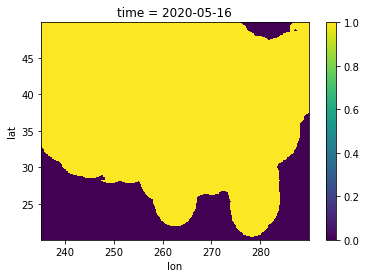

In [23]:
(rq >= 0).plot()

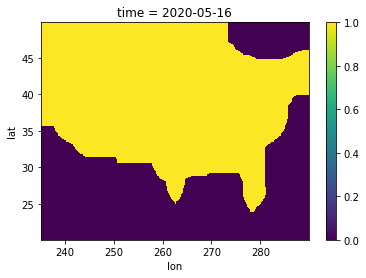

In [34]:
new.plot()

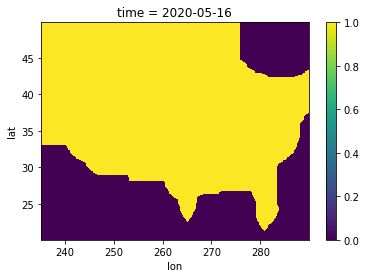

In [49]:
new2.plot()

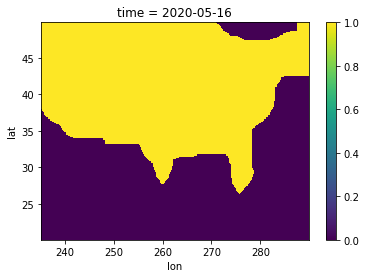

In [74]:
new3.plot()

In [30]:
new

<xarray.DataArray (lat: 750, lon: 1376)>
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Coordinates:
    time     datetime64[ns] 2020-05-16
  * lat      (lat) float64 49.84 49.84 49.84 49.84 ... 20.08 20.08 20.08 20.08
  * lon      (lon) float64 235.2 235.2 235.2 235.2 ... 289.9 289.9 289.9 289.9

In [84]:
ds_train.pad_tigge=5

In [79]:
ds_train._create_rqmask(f'{DATADRIVE}/mrms/4km/RadarQuality.nc')

In [85]:
ds_train._setup_indices()

In [86]:
idxs = ds_train.idxs

In [83]:
len(idxs)

16062

In [87]:
len(idxs)

14376

In [89]:
idxs[:3]

array([[0, 5, 5],
       [0, 5, 6],
       [0, 5, 7]])

In [97]:
ds_train.pad_tigge_channel = False

In [102]:
X, y = ds_train[1]

In [103]:
X.shape, y.shape

((1, 26, 26), (1, 128, 128))

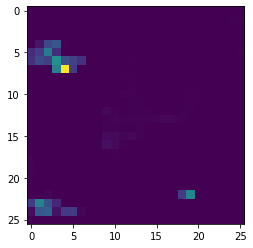

In [104]:
plt.imshow(X[0])

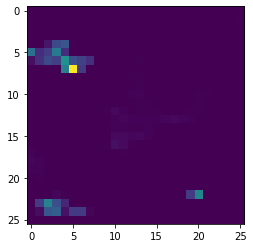

In [101]:
plt.imshow(X[0])

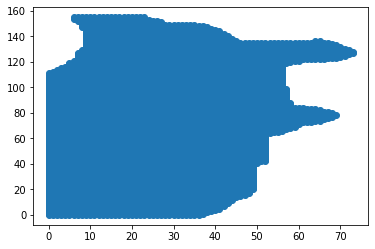

In [78]:
plt.scatter(*np.unique(idxs[:, 1:], axis=0).T)

In [105]:
np.mgrid[2:10:5, 2:10:5]

array([[[2, 2],
        [7, 7]],

       [[2, 7],
        [2, 7]]])